# Data Structures and Comprehensions

Python's data structures are highly flexible and easy to use for a variety of tasks. The basic idea of a data structure to store information in an organized fashion for later use. This tutorial and accompanying video aims to give an overview of the kinds of things Python's data structures can be used for, and how they can be efficiently created out of existing data.

## Basic structures

### Tuple

A tuple is a straightforward way of bundling together a few pieces of related information into an ordered sequence. There is, in general, no expectation that the elements of a tuple be data of the same type. An inventory of products may, for example, be a list of two-element tuples each containing an item (string) and its price (float or integer).

There are 3 main ways to create a tuple. We detail two in this section -- the final will be explained later. The first is the so called "literal" creation of a tuple. In this case, we use round brackets to simply group the information, separated by commas:

In [1]:
a_tuple = ("hello", 12345)

The elements of a tuple are accessed by index, starting with the first element indexed as 0:

In [2]:
a_tuple[0]

'hello'

The other way to create a tuple is with the <code>tuple()</code> built-in function, which will attempt to force another structure to take on the structure of a tuple. Any data ordered sequentially, such as a list or string, is an easy candidate. For instance, we can transform a string into a tuple, each containg a single character like so:

In [3]:
tuple("hello")

('h', 'e', 'l', 'l', 'o')

Once we have a tuple, it is very easy to assign each element to a variable. The following syntax will "unpack" the tuple we created earlier and set each entry to a different variable:

In [4]:
word, number = a_tuple

In [5]:
word

'hello'

In [6]:
number

12345

Another primary use of tuples is in the outputs of functions. A function that returns multiple pieces information is best off returning a tuple containing each item. Then, the function's doc-string (a multi-line comment that appears at the top of the function definition explaining how the function is used) should inform the programmer of what information is returned in the tuple, and in what order. For example, we consider the partition function that can be used on strings. The <code>help()</code> function outputs the function's doc-string:

In [7]:
help(str.partition)

Help on method_descriptor:

partition(...)
    S.partition(sep) -> (head, sep, tail)
    
    Search for the separator sep in S, and return the part before it,
    the separator itself, and the part after it.  If the separator is not
    found, return S and two empty strings.



It may look a little cryptic, but the second line says that the partition function takes a separator character, here called "sep", as its argument, and the output is a tuple containing three pieces of information. Here is an example. Compare the input and output and compare with the doc-string.

In [8]:
"Cat | Dog".partition(" | ")

('Cat', ' | ', 'Dog')

Using the previous technique of unpacking, it is very easy to assign each piece of this output to different variables:

In [9]:
before, middle, after = "Cat | Dog".partition(" | ")

In [10]:
before

'Cat'

In [11]:
after

'Dog'

Tuples are an example of an <i>immutable</i> data type. This means that, once created, they cannot be modified. You cannot add or change an entry in a tuple. If you need a tuple to "change", then what you must really do is create a new tuple and assign it to the same variable.  For instance, let's say I have a pair of numbers (coordinates, say) and wish to add one to each of them. What I must really do is create a new tuple, using the old tuple's information in the process. Example:

In [12]:
coordinates = (5, 3)
# now want new coordinates
coordinates = (coordinates[0] + 1, coordinates[1] + 1)
print(coordinates)

(6, 4)


### List

Lists are the workhorse structure of Python. Their use case should be pretty intuitive -- you want to make a list of things. While both are order sequentially, they differ from tuples in several important ways. The first is that there is the expectation that the items in the list are all of the same kind. To consider a real world example, imagine you are looking at your receipt after buying groceries. It is perfectly sensible that our receipt is a list of triples <code>(item, quantity, price)</code>. However, we would find it incongruous and possibly incomprehensible if items, quantities, and prices were given as separate items in the list! Second, lists are highly dynamic objects. Their entries can be modified, and they can be extended or reduced on the fly. We say they are "mutable". Lists have many functions built into them to facilitate these mutations, and we'll showcase some of the more common ones here. Firstly though, we note that creating a list is very similar to creating a tuple. We have 3 methods for doing it, very similar to the tuple, but using square brackets:

In [13]:
a_list = ["One", "Two", "Three"]

Also, we have the built-in <code>list()</code> function, which will attempt to turn another data structure into a list. For example, a list can be built from a tuple:

In [14]:
a_terrible_pair = ("Ball", "Cassidy") # this is a tuple
list( a_terrible_pair ) # this is a list!

['Ball', 'Cassidy']

It is very common to loop over the elements of the list, performing an operation on each element. In the loop syntax, we give each element a temporary name while we work on it. Suppose we wish to print each item in lowercase:

In [15]:
for number in a_list: # number is the temporary name given to each item as we work on it
    print(number.lower())

one
two
three


One created, the entries in a list can be modified by simply reassigning that entry using the index:

In [16]:
a_list[1] = "Zwei"
print(a_list)

['One', 'Zwei', 'Three']


A very common task is to add entries to the end of the list. We can do this using the <code>append()</code> function that lists can perform. It is worth noting, however, that <code>append()</code> is an efficient solution to an inherently costly operation. When you create a list, the program allocates a certain amount of memory to the list; using the <code>append()</code> method may require the program to allocate more memory to the list, which may involve reorganizing other allocated memory. This increases computing time. Therefore, if it is at all possible, it is best to build your list all in one go, rather than construct it by repeated use of <code>append()</code>. Of course, this is not always possible. Using <code>append()</code> is simple:

In [17]:
a_list.append("Four")
print(a_list)

['One', 'Zwei', 'Three', 'Four']


As well as appending, which always adds the new entry to the end of the list, the <code>insert()</code> function takes as its first argument a position in which to add the new entry:

In [18]:
a_list.insert(0, "Zero")
print(a_list)

['Zero', 'One', 'Zwei', 'Three', 'Four']


The syntax for deleting a list element is a bit different. We write it like this:

In [19]:
del a_list[0]
print(a_list)

['One', 'Zwei', 'Three', 'Four']


The final list operation I'd like to show here is <code>pop()</code>. Pop takes an index as its argument, and outputs the element that index refers to. However, it then <i>deletes</i> the element from the list.  In this way, we can think of a list as a container, and when we "pop" an item from the list, we take it out of the container to do something with it. From our list, we have:

In [20]:
an_item = a_list.pop(2)
print(an_item.upper())
print(a_list)


THREE
['One', 'Zwei', 'Four']


Using <code>pop()</code> with no argument performs this operation on the last element of the list. This leads to a certain kind of algorithm "first in, last out". Conceive of the list as a pile of cards. You can add a card to the top of the stack, or remove the top card. Therefore, the card added first, will be the last card to be retreived.

Let's do an example of this kind of algorithm. Mathematical expressions often use brackets to inform us of the correct order to perform the operations. Suppose we want our program to take a mathematical expression containing brackets, and check that every opening bracket has a corresponding closing bracket, and vice versa. The following code will do this very task:

In [21]:
def check_brackets(expression):
    bracket_list = []
    for character in expression:
        if character == "(":
            bracket_list.append(character) #add opening brackets to the end of the list
        if character == ")":
            if len(bracket_list) == 0: 
                # the list is empty, so there must be no corresponding opening bracket!
                return False
            else:
                # if there's matching opening bracket, remove it from the list!
                bracket_list.pop()
    
    # returns True only if bracket_list is empty at the end (all brackets were matched)
    return len(bracket_list) == 0 
                            

print(check_brackets("5 * (6 + (4 - (5 * 6)))"))
            

True


In [22]:
print(check_brackets("5 * 5 + ((3+4)"))

False


A 2d grid of values can be represented as a list of lists, and values can be looked up by using two indices. A chessboard for a chess game could have the following representation:

In [23]:
board = [
 ["bR", "bN", "bB", "bQ", "bK", "bB", "bN", "bR"],
 ["bP", "bP", "bP", "bP", "bP", "bP", "bP", "bP"],
 [ "" , ""  , ""  , ""  , ""  , ""  , ""  , ""  ],
 [ "" , ""  , ""  , ""  , ""  , ""  , ""  , ""  ],
 [ "" , ""  , ""  , ""  , ""  , ""  , ""  , ""  ],
 [ "" , ""  , ""  , ""  , ""  , ""  , ""  , ""  ],
 ["wP", "wP", "wP", "wP", "wP", "wP", "wP", "wP"],
 ["wR", "wN", "wB", "wQ", "wK", "wB", "wN", "wR"]]

# look up what piece is in a square
print(board[1][3])

bP


### Dictionaries

Dictionaries are one of the nicest structures in Python. With our previous structures, we could only retreive elements by index -- that is, by the order in which they appear. However, it is very common that the order is not important to us, and we wish to use a word or other identifier to retreive the item from the structure. This is where dictionaries come in. A dictionary is a "key-value pair" -- the key is the word (or other identifier) we use to obtain the value. To create a dictionary, we use curly braces. For example:

In [24]:
capital_cities = {"UK": "London",
                  "India": "New Delhi",
                  "Germany": "Berlin"}
print(capital_cities["Germany"])

Berlin


In [25]:
beekeeper = {"Name": "Sam", "Country": "UK"}

print(capital_cities[beekeeper["Country"]]) # briefly ponder what this line does

London


Keys must be immutable -- objects that cannot be changed. Strings and numbers are good examples of immutable data types. Values can be anything you like. Strings, numbers, lists, even functions! Adding an item to a dictionary is as simple as this:

In [26]:
capital_cities["Russia"] = "Moscow"

Dictionaries can be looped over just like lists, but it is usually less clear in what order the items will be looped over, so make sure what you are doing doesn't depend too heavily on the order the operations are performed:

In [27]:
for country in capital_cities:
    print(country)

UK
India
Germany
Russia


Deleting an item from a dictionary is akin to doing the same for a list:

In [28]:
del capital_cities["UK"]

In [29]:
print(capital_cities)

{'India': 'New Delhi', 'Germany': 'Berlin', 'Russia': 'Moscow'}


So, when do we use a dictionary? A key feature of dictionaries is that they allow us to assign words to other objects. This sounds remeniscent of variables, with which we are already very familiar. The difference is that variables are something created by the programmer to appear in the source code. The keys of a dictionary can be created by the program itself as it is running. Suppose your program is running and creating lots of new data, and you want to assign names to the different bits of data you are creating as the program is running. The program cannot create a new variable. But it can put the data into a dictionary and give it a key!

<b>Exercises with data structures</b>

1. Create a list of 4 tuples, each being a pair containing a 
2. Use the <code>dict()</code> function on the list from exercise 1. Note how this is similar to the <code>tuple()</code> and <code>list()</code> functions. Give the dictionary a name like <code>temp</code>
3. Create a for-loop that prints the items in the dictionary created in problem 2. Notice how this only prints the keys of the dictionary. Now loop over <code>temp.values()</code> instead of <code>temp</code>, and see what happens. What happens if you loop over <code>temp.items()</code>? What data structures does <code>.items()</code> return?
4. (challenge) Modify the <code>check_brackets()</code> code above so that it checks the validity of expressions containing a combination of round, square and curly brackets. <i>Hint:</i> Create a dictionary that associates each kind of opening bracket to its appropriate closing bracket (e.g [ to ]).


## Comprehensions

Now we get to something interesting and very useful. So far, we have been constructing tuples, lists and dictionaries by specifying the items individually. This is all very well, but for large structures, it could take forever! A comprehension is a line of code that specifies how to create a structure by describing the objects in it, rather than stating each one explicitly. We will focus here on <i>list</i> comprehensions, but the syntax is very similar for the other structures.

Suppose we wish to create a list containing the numbers 0 to 99. A naive way to achieve this task might be:

In [30]:
numbers = []
for x in range(100):
    numbers.append(x)

As mentioned above, this repeated use of <code>append()</code> is slow -- it would be faster to create the list containing all the numbers at once, rather than constantly modifying the size of the list. This is where list comprehensions come in. The correct syntax, which we will break down in just a moment is:

In [31]:
numbers = [x for x in range(100)]

Both of these snippets achieve the same task, but one is shorter, clearer, and faster. Let's take a quick look at the syntax. Note first that we still use square brackets to create the list (if we wanted to use a tuple comprehension, we'd use round brackets). Now, what is this "x for x" business? Look first at the latter part of the syntax. It should look exactly like the header of a for-loop <code> for x in range(100)</code>. The first <code>x</code> is any expression that should be evaluated for each <code>x</code> before putting the result into the list. In this case, an example really does speak a thousand words:

In [32]:
numbers = [x**2 for x in range(100)]
print(numbers)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529, 576, 625, 676, 729, 784, 841, 900, 961, 1024, 1089, 1156, 1225, 1296, 1369, 1444, 1521, 1600, 1681, 1764, 1849, 1936, 2025, 2116, 2209, 2304, 2401, 2500, 2601, 2704, 2809, 2916, 3025, 3136, 3249, 3364, 3481, 3600, 3721, 3844, 3969, 4096, 4225, 4356, 4489, 4624, 4761, 4900, 5041, 5184, 5329, 5476, 5625, 5776, 5929, 6084, 6241, 6400, 6561, 6724, 6889, 7056, 7225, 7396, 7569, 7744, 7921, 8100, 8281, 8464, 8649, 8836, 9025, 9216, 9409, 9604, 9801]


Imagine how long it would have taken to construct this list manually. We have squared each number before adding it to the list. The expression to evaluate can be pretty much anything! For example, we create a list here of tuples containing each number, and whether or not it is prime:

In [33]:
def is_prime(n):
    '''basic function to determine if a number is prime'''
    if n < 2:
        return False
    for i in range(2, int(n**(0.5)+1)):
        if n % i == 0:
            return False
    return True

prime_list = [(p, is_prime(p)) for p in range(20)] # here's the list comprehension!

In [34]:
# Now let's view the list
for pair in prime_list:
    print(pair)

(0, False)
(1, False)
(2, True)
(3, True)
(4, False)
(5, True)
(6, False)
(7, True)
(8, False)
(9, False)
(10, False)
(11, True)
(12, False)
(13, True)
(14, False)
(15, False)
(16, False)
(17, True)
(18, False)
(19, True)


A list comprehension can also contain if clauses. We could create a list of the prime numbers less than 1000 with the following code:

In [35]:
prime_list = [p for p in range(1000) if is_prime(p)]
print(prime_list)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]


This just about covers the power of list comprehensions. Of course, these have only been toy examples, creating lists of numbers with various properties. List comprehensions can be used to construct lists of pretty much anything. In our demonstration video today, we use list comprehensions to solve a problem that involves extracting data from a file and storing that data in a list.

It is potentially useful when you are just beginning Python, to work always with the Data Structures page from the manual open https://docs.python.org/3/tutorial/datastructures.html. A large amount of what we do when programming is organizing and retrieving data in structures, so having a reference to all the basic tasks Python can do with its structures is extremely useful!

### Exercises with comprehensions

1. Create a list containg the first 10 numbers in the 3 times table, using a comprehension.
2. Now create a list of 10 lists, with the $k$th list being the first 10 numbers of the $k$ times table, using a list comprehension within a list comprehension ("nested").
3. Head over to https://docs.python.org/3/, the website that contains Python's instruction manual. It's enormous, but knowing your way around it is extremely important for your development as a Python programmer. Try to find the section that explains how to make a dictionary comprehension, and try it out yourself.

## Example video

In the following example video, we make use of tuples, dictionaries, and list comprehensions to solve a problem.

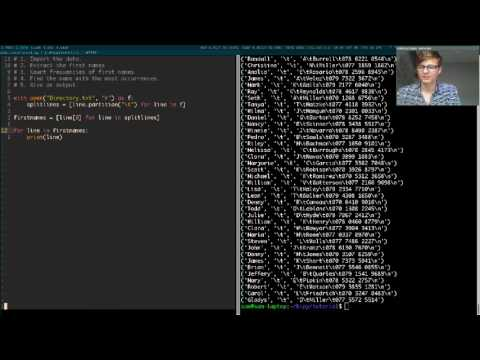

In [36]:
from IPython.display import YouTubeVideo
YouTubeVideo("TXiTmmlKmKY")

<b>Footnote to the video</b>

In the video, we implement a counting dictionary. Python's standard library includes an easier and more powerful way to produce a counting dictionary:

In [37]:
from collections import Counter

a_list = ['A', 'B', 'B', 'C']
count = Counter(a_list)
print(count)

Counter({'B': 2, 'A': 1, 'C': 1})


In [38]:
# Hence the same problem from the video can be solved like this:

with open("Directory.txt") as f:
    namecount = Counter([line.partition("\t")[0] for line in f])

print("Most common name is", namecount.most_common(1))
# dictionaries provided by Counter come with a function called most_common

Most common name is [('John', 60)]


This dictionary comes equipped with some additional features (exactly how this works will be explained in the Object Oriented Programming articles), but the counting algorithm is virtually the same as ours, and seeing algorithms like this is good for the soul of any programmer. 

## Practice Makes Perfect

Now equipped with a basic knowledge of functions, data structures, mathematical operations and flow control, you are pretty much ready to start using Python to try to solve simple problems. It's now up to you to practice. Not sure about something? Python's documentation and the excellent programming question and answer website stackoverflow.com will almost certainly have the solution.

Not sure where to begin practising? Here's some recommendations:

1) Come up with a simple project of your own to solve.

2) checkio.org is a fantastic website with an enormous selection of Python programming challenges. The objective of each challenge is to write a function in the browser window that completes a certain task, and then the website itself will test if your function really does meet the required criteria. Once you've solved it you can read other people's solutions to get tips on how to do it better.

3) If you enjoy a little mathematics, projecteuler.net is a website that provides mathematical problems that are best solved with the aid of a computer and a programming language such as Python. There are hundreds, and they range from very easy (beginning with a variation on Fizzbuzz!) to obscenely difficult.